In [1]:
import numpy as np

In [30]:
np.random.RandomState(42)
X = np.random.randint(0, 12, (3, 4))
x = np.random.randint(0, 12, 16)
x, X

(array([ 7,  4,  1,  9,  9, 10, 11,  3, 11,  0,  8,  4,  9, 11,  0,  9]),
 array([[ 7, 10,  0,  5],
        [11,  3,  3,  5],
        [ 2,  1,  4,  3]]))

In [10]:
# sorts all rows
np.sort(X) # uses a n log(n) quicksort by default

array([[ 3,  4,  7, 11],
       [ 2,  4,  5,  9],
       [ 0,  2,  3,  6]])

In [14]:
# sorts all cols
np.sort(X, axis=1)

array([[ 3,  4,  7, 11],
       [ 2,  4,  5,  9],
       [ 0,  2,  3,  6]])

In [26]:
# returns sort index
i = np.argsort(x)
i, x[i]

(array([4, 6, 7, 3, 1, 2, 0, 5]), array([0, 1, 1, 2, 4, 5, 7, 7]))

In [33]:
# partial sort 
k = 4
p = np.partition(x, k) # returns a partitions fo the sorted array up to 'k'
p

array([ 0,  0,  1,  3,  4,  4,  7, 11, 11, 10,  8,  9,  9, 11,  9,  9])

In [34]:
np.argpartition(x, 4) # same as np.partition but returns indexes of original array

array([14,  9,  2,  7, 11,  1,  0,  6,  8,  5, 10,  4, 12, 13,  3, 15])

In [103]:
# k-nearest neighbors
sample = np.random.rand(10, 2)
sample[8, 1]

0.6994288730390432

In [66]:
a = sample[:, np.newaxis, :]
b = sample[np.newaxis, :, :]
d = a - b
sq_dist = d ** 2
dist_list = sq_dist.sum(-1)
dist_list

array([[0.        , 0.17890438, 0.25315321, 0.20301621, 0.03005431,
        0.8171248 , 0.24885414, 0.35467464, 0.13459656, 0.48621261],
       [0.17890438, 0.        , 0.57090577, 0.72426807, 0.08279586,
        0.92954718, 0.84252027, 0.34317613, 0.1523987 , 0.67597531],
       [0.25315321, 0.57090577, 0.        , 0.13489184, 0.41624022,
        0.23946178, 0.25354409, 0.15722538, 0.1519824 , 0.07197687],
       [0.20301621, 0.72426807, 0.13489184, 0.        , 0.38879779,
        0.72698228, 0.01858234, 0.52142412, 0.36752281, 0.40263647],
       [0.03005431, 0.08279586, 0.41624022, 0.38879779, 0.        ,
        0.98292367, 0.44141573, 0.4150597 , 0.16327691, 0.64333443],
       [0.8171248 , 0.92954718, 0.23946178, 0.72698228, 0.98292367,
        0.        , 0.97734502, 0.14336582, 0.35702439, 0.049712  ],
       [0.24885414, 0.84252027, 0.25354409, 0.01858234, 0.44141573,
        0.97734502, 0.        , 0.72278475, 0.51249786, 0.59419975],
       [0.35467464, 0.34317613, 0.1572253

In [67]:
np.argsort(dist_list) # all neighbors in order

array([[0, 4, 8, 1, 3, 6, 2, 7, 9, 5],
       [1, 4, 8, 0, 7, 2, 9, 3, 6, 5],
       [2, 9, 3, 8, 7, 5, 0, 6, 4, 1],
       [3, 6, 2, 0, 8, 4, 9, 7, 1, 5],
       [4, 0, 1, 8, 3, 7, 2, 6, 9, 5],
       [5, 9, 7, 2, 8, 3, 0, 1, 6, 4],
       [6, 3, 0, 2, 4, 8, 9, 7, 1, 5],
       [7, 8, 9, 5, 2, 1, 0, 4, 3, 6],
       [8, 7, 0, 2, 1, 4, 9, 5, 3, 6],
       [9, 5, 2, 7, 8, 3, 0, 6, 4, 1]])

In [95]:
k = 1
nearest_partition = np.argpartition(dist_list, k+1, axis=1)
nearest_partition

array([[0, 4, 8, 3, 1, 5, 6, 7, 2, 9],
       [1, 4, 8, 3, 0, 5, 6, 7, 2, 9],
       [2, 9, 3, 0, 4, 5, 6, 7, 8, 1],
       [3, 6, 2, 0, 4, 5, 1, 7, 8, 9],
       [4, 0, 1, 3, 2, 5, 6, 7, 8, 9],
       [5, 9, 7, 3, 4, 0, 6, 2, 8, 1],
       [6, 3, 0, 1, 4, 5, 2, 7, 8, 9],
       [7, 8, 9, 3, 4, 5, 6, 0, 1, 2],
       [8, 7, 0, 3, 4, 5, 6, 1, 2, 9],
       [9, 5, 2, 3, 4, 1, 6, 7, 8, 0]])

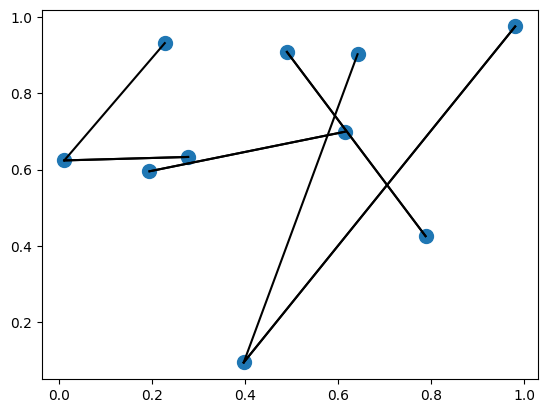

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(sample[:, 0], sample[:, 1], s=100)

for i in range(sample.shape[0]):
    for j in nearest_partition[i, :k+1]:
        plt.plot(*zip(sample[j], sample[i]), color="black")